### *** FLIGHT PRICE PREDICTION

#### **** PROBLEM STATEMENT

**** Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines for the months of February and between various cities.

### *** Features

****__1-Date: The date of the journey.
    
****__2-Airline: The name of the airline.

****__3-ch_code: The categorical identification code of the flight.
    
****__4-num_code:The numerical identification code of the flight.
    
****__5-Dep_Time: The time when the journey starts from the source.
        
****__6-From: The source from which the service begins.
    
****__7-Time Taken: Total Duration of the flight.
        
****__8-Stops: Total stops between the source and destination.
    
****__9-Arrival_Time: Time of arrival at the destination.
    
****__10-To: The destination where the service ends.

****__11-Price: The price of the ticket.

### Importing the librabries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import time, datetime
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,mean_absolute_percentage_error



### **Code

#### Loading the data

#### ***We have got to csv files so we will load them seperately and after that we will merge them into one***

In [2]:
a=pd.read_csv(r"D:\MACHINE LEARNING STUDY MATERIAL\Project\business.csv")
a.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [3]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  object
 3   num_code    93487 non-null  int64 
 4   dep_time    93487 non-null  object
 5   from        93487 non-null  object
 6   time_taken  93487 non-null  object
 7   stop        93487 non-null  object
 8   arr_time    93487 non-null  object
 9   to          93487 non-null  object
 10  price       93487 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.8+ MB


In [4]:
b=pd.read_csv(r"D:\MACHINE LEARNING STUDY MATERIAL\Project\economy.csv")
b.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [5]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object
 3   num_code    206774 non-null  int64 
 4   dep_time    206774 non-null  object
 5   from        206774 non-null  object
 6   time_taken  206774 non-null  object
 7   stop        206774 non-null  object
 8   arr_time    206774 non-null  object
 9   to          206774 non-null  object
 10  price       206774 non-null  object
dtypes: int64(1), object(10)
memory usage: 17.4+ MB


In [6]:
a.shape,b.shape

((93487, 11), (206774, 11))

### Adding new feature in both of the dataframes.

In [7]:
a['class']='business'
b['class']='economy'

#### Appending the records that is concating both the dataframes into one seperate dataframe.

In [8]:
new=b.append(a,ignore_index=True)
new.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy


#### Merging the 'ch_code' and 'num_code' two seperate variables into one as 'flight'

Step 1-- Since both columns has different datatypes we need to change the dtype to string

Step 2--Now we can easily create new column which can support the values from both the variables

In [9]:
new.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy


In [10]:
new.num_code = new.num_code.astype("str")
new["flight"] = new["ch_code"]+"-"+new["num_code"]
new.drop(["ch_code","num_code"],axis = 1,inplace = True)

In [11]:
new.head()

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,flight
0,11-02-2022,SpiceJet,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy,SG-8709
1,11-02-2022,SpiceJet,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy,SG-8157
2,11-02-2022,AirAsia,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy,I5-764
3,11-02-2022,Vistara,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy,UK-995
4,11-02-2022,Vistara,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy,UK-963


In [12]:
new.shape

(300261, 11)

In [13]:
new.date.unique()

array(['11-02-2022', '12-02-2022', '13-02-2022', '14-02-2022',
       '15-02-2022', '16-02-2022', '17-02-2022', '18-02-2022',
       '19-02-2022', '20-02-2022', '21-02-2022', '22-02-2022',
       '23-02-2022', '24-02-2022', '25-02-2022', '26-02-2022',
       '27-02-2022', '28-02-2022', '01-03-2022', '02-03-2022',
       '03-03-2022', '04-03-2022', '05-03-2022', '06-03-2022',
       '07-03-2022', '08-03-2022', '09-03-2022', '10-03-2022',
       '11-03-2022', '12-03-2022', '13-03-2022', '14-03-2022',
       '15-03-2022', '16-03-2022', '17-03-2022', '18-03-2022',
       '19-03-2022', '20-03-2022', '21-03-2022', '22-03-2022',
       '23-03-2022', '24-03-2022', '25-03-2022', '26-03-2022',
       '27-03-2022', '28-03-2022', '29-03-2022', '30-03-2022',
       '31-03-2022'], dtype=object)

#### ****** We have 300259 rows and 11 columns

### Renaming the featuers for better understanding

In [14]:
new.rename({'dep_time':'departure_time','from':'source_city','time_taken':'duration','stop':'stops',
           'arr_time':'arrival_time','to':'destination_city'},axis=1,inplace=True)

In [15]:
new

,date,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight
0,11-02-2022,SpiceJet,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy,SG-8709
1,11-02-2022,SpiceJet,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy,SG-8157
2,11-02-2022,AirAsia,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy,I5-764
3,11-02-2022,Vistara,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy,UK-995
4,11-02-2022,Vistara,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy,UK-963
...,...,...,...,...,...,...,...,...,...,...,...
300256,31-03-2022,Vistara,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265",business,UK-822
300257,31-03-2022,Vistara,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105",business,UK-826
300258,31-03-2022,Vistara,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099",business,UK-832
300259,31-03-2022,Vistara,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585",business,UK-828


In [16]:
dd = pd.DataFrame(new["date"].str.split("-",expand = True).to_numpy().astype(int),columns = ["day","month","year"])

In [17]:
dd

,day,month,year
0,11,2,2022
1,11,2,2022
2,11,2,2022
3,11,2,2022
4,11,2,2022
...,...,...,...
300256,31,3,2022
300257,31,3,2022
300258,31,3,2022
300259,31,3,2022


### Adding new column indicating the number of days left for travelling

In [18]:
new["days_left"] = np.where(dd["month"] > 2, dd["day"] +18, np.where(dd["month"] == 2, dd["day"] -10, dd["day"]))
new.head(2)

,date,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,11-02-2022,SpiceJet,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy,SG-8709,1
1,11-02-2022,SpiceJet,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy,SG-8157,1


**** Now we dont need date column so  we will drop it as we have created new column called as 'days_left'.

In [19]:
new.drop('date',axis=1,inplace=True)

In [20]:
new.head()

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,SpiceJet,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy,SG-8709,1
1,SpiceJet,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy,SG-8157,1
2,AirAsia,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy,I5-764,1
3,Vistara,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy,UK-995,1
4,Vistara,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy,UK-963,1


### Converting departure time into morming/noon/evening

In [21]:
s= (pd.to_datetime(new["departure_time"]).dt.hour % 24 + 4) // 4
s.replace({1: 'Late Night', 2: 'Early Morning', 3: 'Morning', 
                      4: 'Afternoon', 5: 'Evening', 6: 'Night'} ,inplace = True)
new["departure_time"] = s 
new.head(1)

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,SpiceJet,Evening,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy,SG-8709,1


In [22]:
new.arrival_time.min(),new.arrival_time.max()

('00:05', '23:59')

### Creating categories in arrival_time column by creating bins

In [23]:
temp = pd.DataFrame(new["arrival_time"].str.split(":",expand = True).to_numpy().astype(int),columns = ["hour","minute"])

In [24]:
temp

,hour,minute
0,21,5
1,8,40
2,6,35
3,12,35
4,11,10
...,...,...
300256,19,50
300257,22,55
300258,20,55
300259,17,0


In [25]:
new['arrival_time']=pd.cut(x=temp['hour'],bins=6,labels=['Late Night','Early Morning','Morning',
                                                        'Afternoon','Evening','Night'])

In [26]:
new.head(1)

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,SpiceJet,Evening,Delhi,02h 10m,non-stop,Night,Mumbai,"5,953",economy,SG-8709,1


### Making duration in float values by calculating only hours

In [27]:
temp = pd.DataFrame(new["duration"].str.split(expand = True).to_numpy().astype(str), 
                    columns = ["hour","minute"])

In [28]:
temp.hour.unique()

array(['02h', '12h', '16h', '11h', '14h', '15h', '03h', '05h', '08h',
       '06h', '18h', '23h', '24h', '04h', '19h', '22h', '26h', '17h',
       '20h', '21h', '07h', '10h', '28h', '09h', '13h', '29h', '27h',
       '30h', '25h', '31h', '33h', '36h', '35h', '34h', '39h', '01h',
       '37h', '40h', '32h', '7h', '41h', '38h', '1.03h', '1.02h', '2h',
       '00h', '47h', '1.01h', '5h', '42h', '49h', '45h', '44h'],
      dtype=object)

In [29]:
temp["hour"] = temp["hour"].apply(lambda x: re.sub("[^0-9]","",x)).astype(int)

In [30]:
temp.hour.unique()

array([  2,  12,  16,  11,  14,  15,   3,   5,   8,   6,  18,  23,  24,
         4,  19,  22,  26,  17,  20,  21,   7,  10,  28,   9,  13,  29,
        27,  30,  25,  31,  33,  36,  35,  34,  39,   1,  37,  40,  32,
        41,  38, 103, 102,   0,  47, 101,  42,  49,  45,  44])

In [31]:
temp.minute.unique()

array(['10m', '20m', '15m', '05m', '45m', '30m', '40m', '50m', '00m',
       '25m', '35m', '55m', '04m', 'm', '59m', '24m'], dtype=object)

In [32]:
temp["minute"] = temp["minute"].apply(lambda r: re.sub("[^0-9]","",r))

In [33]:
temp.minute.unique()

array(['10', '20', '15', '05', '45', '30', '40', '50', '00', '25', '35',
       '55', '04', '', '59', '24'], dtype=object)

#### We have no values in minute column so we will replace it with 0

In [34]:
temp["minute"] = np.where(temp["minute"] == "", 0, temp["minute"]) # replaceing "" with 0

In [35]:
temp.minute.unique()

array(['10', '20', '15', '05', '45', '30', '40', '50', '00', '25', '35',
       '55', '04', 0, '59', '24'], dtype=object)

In [36]:
temp.minute.info()

<class 'pandas.core.series.Series'>
RangeIndex: 300261 entries, 0 to 300260
Series name: minute
Non-Null Count   Dtype 
--------------   ----- 
300261 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB


#### Our Minute column has object data type so we will need to change it to int 

In [37]:
temp["minute"] = temp["minute"].astype(int)

In [38]:
temp.minute.info()

<class 'pandas.core.series.Series'>
RangeIndex: 300261 entries, 0 to 300260
Series name: minute
Non-Null Count   Dtype
--------------   -----
300261 non-null  int32
dtypes: int32(1)
memory usage: 1.1 MB


In [39]:
temp.head()

,hour,minute
0,2,10
1,2,20
2,2,10
3,2,15
4,2,20


#### Combining the hour and minute as total hours into one columm duration column

In [40]:
new["duration"] = np.around((temp["hour"] + (temp["minute"]/60)),2) 
new.head(1)

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,SpiceJet,Evening,Delhi,2.17,non-stop,Night,Mumbai,"5,953",economy,SG-8709,1


In [41]:
new.stops.unique()

array(['non-stop ',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '2+-stop',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GOP\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Raipur\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Nagpur\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Surat\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t

In [42]:
new.stops.dtypes

dtype('O')

#### Stops column is in object we will convert it into intger

In [43]:
new["stops"] = new["stops"].apply(lambda r: re.sub("[^0-9]","",r))
new['stops']=np.where(new['stops']=="",0,new['stops'])
new['stops']=new['stops'].astype(int)
new.head(1)

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,SpiceJet,Evening,Delhi,2.17,0,Night,Mumbai,"5,953",economy,SG-8709,1


In [44]:
new.price.unique()

array(['5,953', '5,956', '5,955', ..., '87,051', '74,731', '77,105'],
      dtype=object)

### Price column has ',' in between the price of tickets

In [45]:
new["price"] = new["price"].apply(lambda r: re.sub("[^0-9]","",r))
new['price']=new['price'].astype(int)
new.head(1)

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,SpiceJet,Evening,Delhi,2.17,0,Night,Mumbai,5953,economy,SG-8709,1


In [46]:
new.price.unique()

array([ 5953,  5956,  5955, ..., 87051, 74731, 77105])

### Arranging the new features

In [47]:
new=new[["airline","flight","source_city","departure_time","stops",
     "arrival_time","destination_city","class","duration","days_left","price"]]

### Renaming the data frame as " df "

In [48]:
df=new
df.sample(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
48644,AirAsia,I5-942,Mumbai,Afternoon,1,Night,Delhi,economy,9.17,30,2336
47544,GO FIRST,G8-7537,Mumbai,Afternoon,0,Evening,Delhi,economy,2.08,25,2339
13788,AirAsia,I5-798,Delhi,Afternoon,1,Night,Bangalore,economy,10.58,20,13411
100206,Vistara,UK-846,Bangalore,Morning,0,Morning,Mumbai,economy,1.75,36,2150
36470,AirAsia,I5-721,Delhi,Night,1,Morning,Chennai,economy,11.75,11,7426


In [49]:
df.isnull().sum()


airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

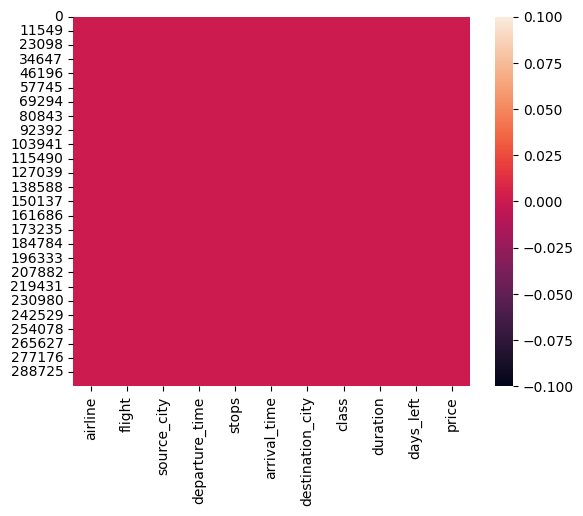

In [50]:
sns.heatmap(df.isnull())
plt.show()

##### Great there is no missing values in our dataframe

#### Getting all details of dataframe

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   airline           300261 non-null  object  
 1   flight            300261 non-null  object  
 2   source_city       300261 non-null  object  
 3   departure_time    300261 non-null  object  
 4   stops             300261 non-null  int32   
 5   arrival_time      300261 non-null  category
 6   destination_city  300261 non-null  object  
 7   class             300261 non-null  object  
 8   duration          300261 non-null  float64 
 9   days_left         300261 non-null  int32   
 10  price             300261 non-null  int32   
dtypes: category(1), float64(1), int32(3), object(6)
memory usage: 19.8+ MB


### Getting the statistical measures

In [52]:
df.describe()

,stops,duration,days_left,price
count,300261.000000,300261.000000,300261.000000,300261.000000
mean,0.924213,12.219142,26.004473,20883.717666
std,0.398188,7.200348,13.560985,22695.911266
min,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,6.750000,15.000000,4783.000000
50%,1.000000,11.250000,26.000000,7425.000000
75%,1.000000,16.170000,38.000000,42521.000000
max,2.000000,103.000000,49.000000,123071.000000


#### Checking for the duplicated rows

In [53]:
df.duplicated().sum()

2

#### Dropping the duplicate values

In [54]:
df.drop_duplicates(inplace=True)

In [55]:
df.duplicated().sum()

0

### Checking what are the values for each category in airline

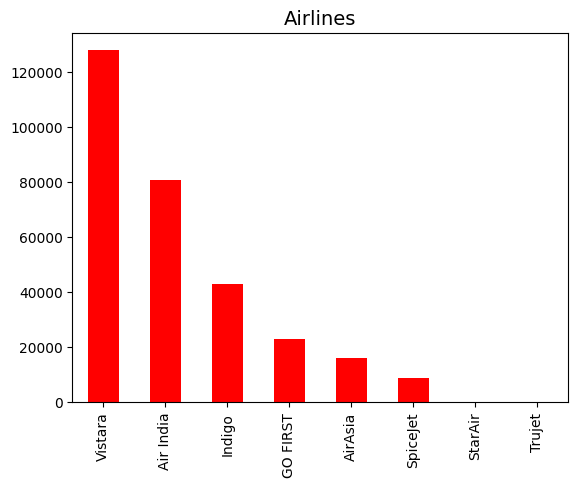

In [56]:
df.airline.value_counts().plot(kind='bar',cmap='flag')
plt.title('Airlines',fontsize=14)
plt.show()

### Checking what are values for each category in source city

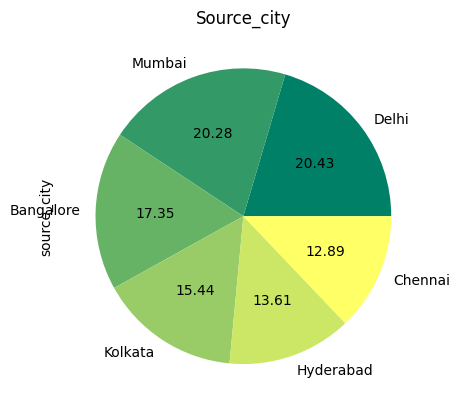

In [57]:
df["source_city"].value_counts().plot(kind = "pie", textprops={'color':'black'},autopct="%.2f",cmap="summer")
plt.title('Source_city',fontsize=12)
plt.show()

****--> Delhi is the place from where maximum flights take-off followed by Mumbai. 

****--> Chennai is the place from where minimum flights take-off. 

### Checking what are the values for each category in departure_time

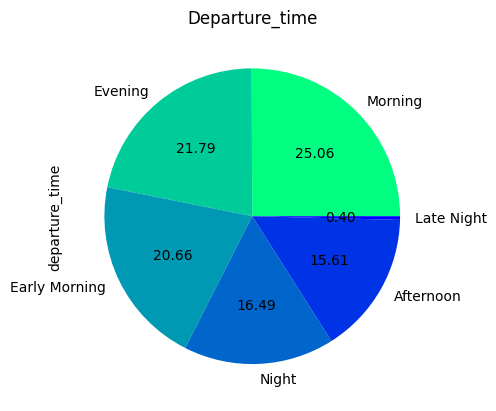

In [58]:
df["departure_time"].value_counts().plot(kind="pie",autopct="%.2f",cmap="winter_r")
plt.title('Departure_time',fontsize=12)
plt.show()

****--> Maximum flights depart in the morning. 

****--> Very few flights depart at late night.

### Checking what are the values for each category in stops

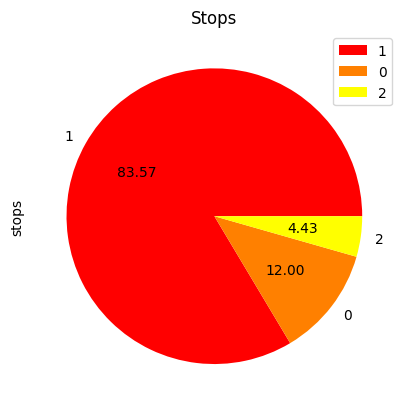

In [59]:
df["stops"].value_counts().plot(kind="pie", textprops={'color':'black'},autopct="%.2f",cmap="autumn")
plt.title('Stops',fontsize=12)
plt.legend([1,0,2])
plt.show()

****--> Most of the flights have 1 stop before reaching there destination.

****--> Very few flights have no stops before reaching there destinaion.

### Checking what are the values for each category in arrival_time

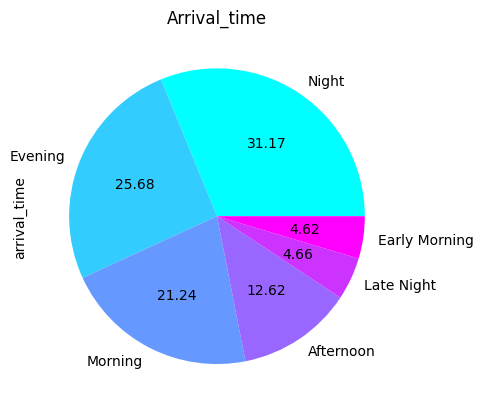

In [60]:
df["arrival_time"].value_counts().plot(kind="pie",autopct="%.2f",cmap="cool")
plt.title('Arrival_time',fontsize=12)
plt.show()

****--> Most of the flights arrive at Night.

****--> Very few flights arrive at Early Morning and Late Night. 

### Checking what are the values for each category in destination_city

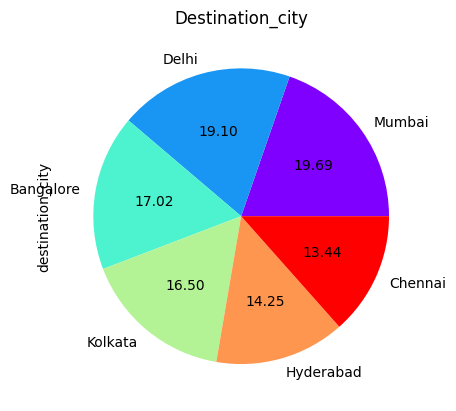

In [61]:
df["destination_city"].value_counts().plot(kind="pie",autopct="%.2f",cmap="rainbow")
plt.title('Destination_city',fontsize=12)
plt.show()

****--> MUmbai has the number of flights coming in.

****--> Chennai has the least number of flights coming in. 

### Checking what are the values for each category in class

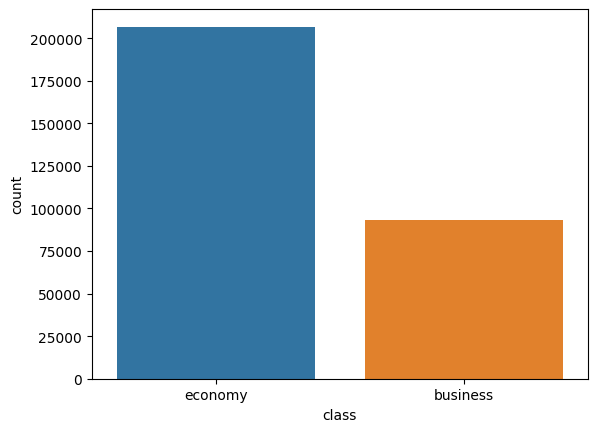

In [62]:
sns.countplot(df['class'],data=df)
plt.show()

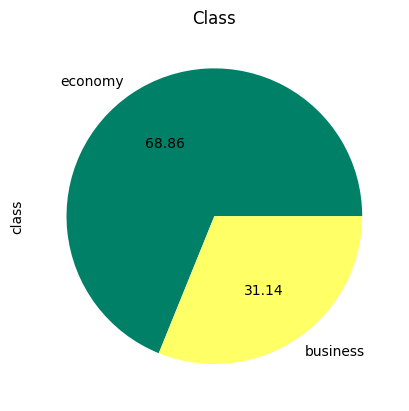

In [63]:
df["class"].value_counts().plot(kind="pie",autopct="%.2f",cmap="summer")
plt.title('Class',fontsize=12)
plt.show()

****--> AS we can see Economy class tickets are more purchased than the business class.

### Checking the distribution of Duration column

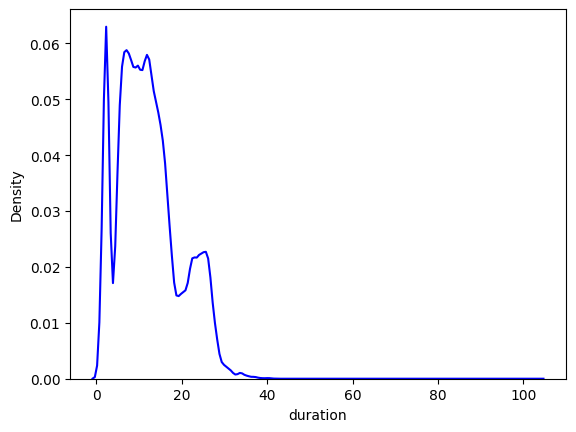

In [64]:
sns.distplot(df['duration'],kde=True,color='Blue',hist=False)
plt.show()

***--> We can clearly see that there was skewness in the duration column 

### Checking the distribution of days

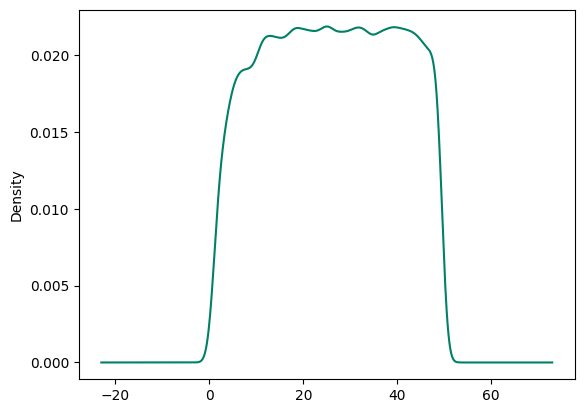

In [65]:
df["days_left"].plot(kind = "kde",cmap = "summer")
plt.show()

****--> To overcome the skewnwss we had created 'days_left',and we can clearly see that the data is normally distributed.

### Checking if the price vary according to the airlines

In [66]:
s=df.groupby('airline')['price'].mean().sort_values()

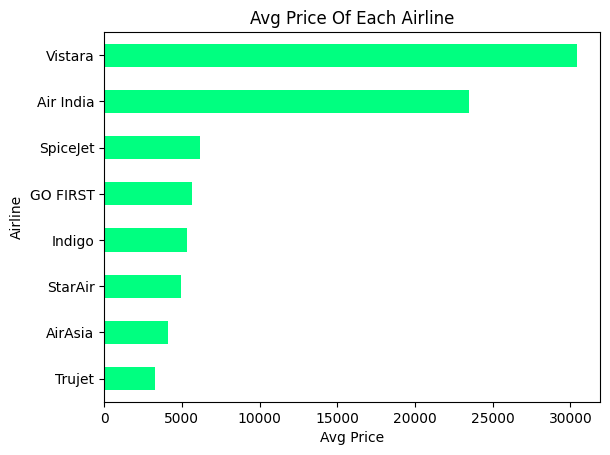

In [67]:
s.plot(kind = "barh",cmap = "winter_r")
plt.ylabel("Airline")
plt.xlabel("Avg Price")
plt.title("Avg Price Of Each Airline")
plt.show()

****--->We can clearly see the price depends upon the airlines

****--->With Vistara being the costliest and Trujet being the cheapest

### Exploring do there is price rise if tickets are booked before 1 or 2 days before departure

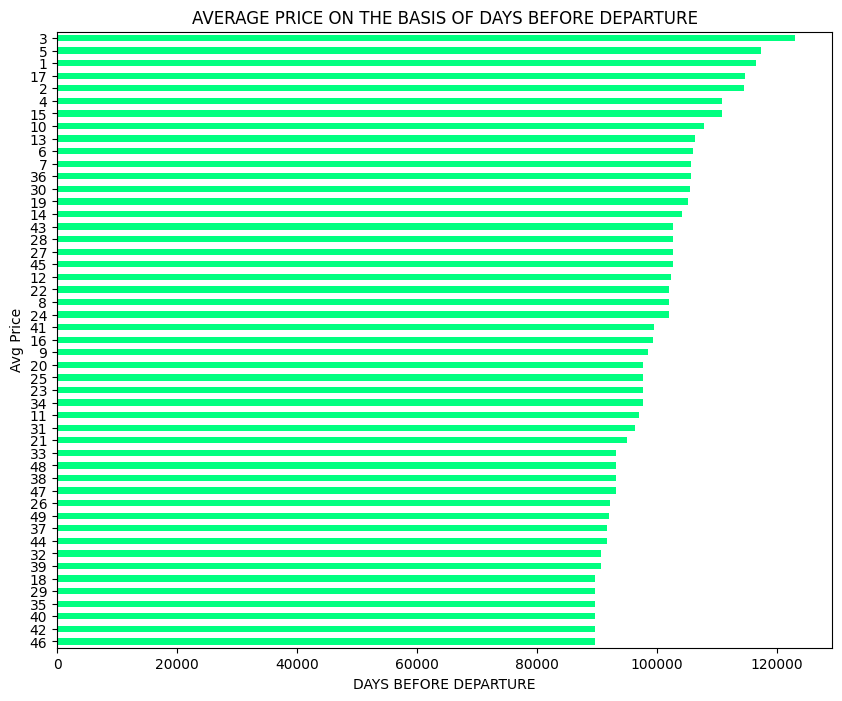

In [68]:
plt.figure(figsize=(10,8))
s = df.groupby(["days_left"])["price"].max().sort_values()
s.plot(kind = "barh",cmap = "winter_r")
plt.ylabel("Avg Price")
plt.xlabel("DAYS BEFORE DEPARTURE")
plt.title("AVERAGE PRICE ON THE BASIS OF DAYS BEFORE DEPARTURE")
plt.show()

****---> It can clearly be observed that the ticket prices rise if booked before 2 or 3 days of deperature.

### Analysing Does ticket price change based on the arrival time?

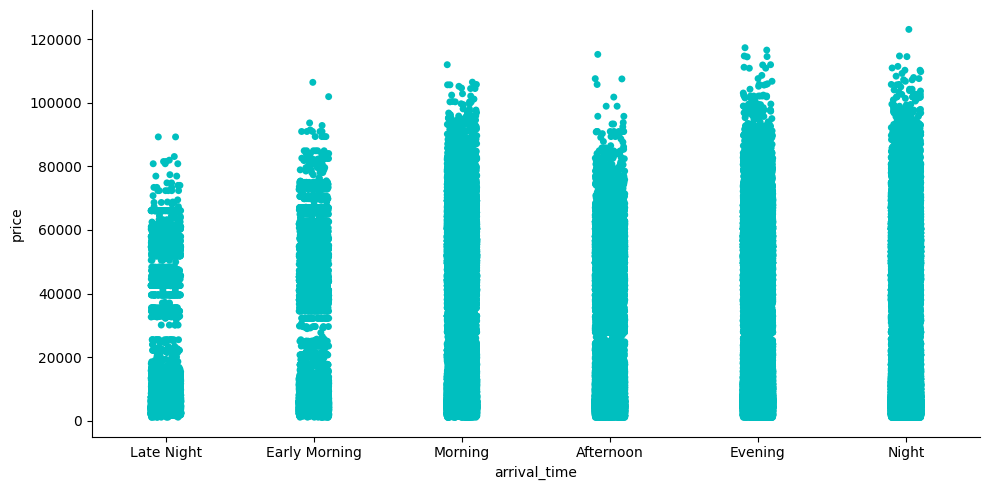

In [69]:
sns.catplot(x = 'arrival_time',y = 'price',kind = 'strip',data = df,color = "c",aspect = 2)
plt.show()

***--1> Ticket Price is More for the Flights when the Arrival Time is at Evening.

***--2> Ticket Price is almost equal for flights Having Arrival time  at Morning and Night.

***--3>Ticket Price is Low for the Flights Having Arrival Time at Late_night as same as Departure Time

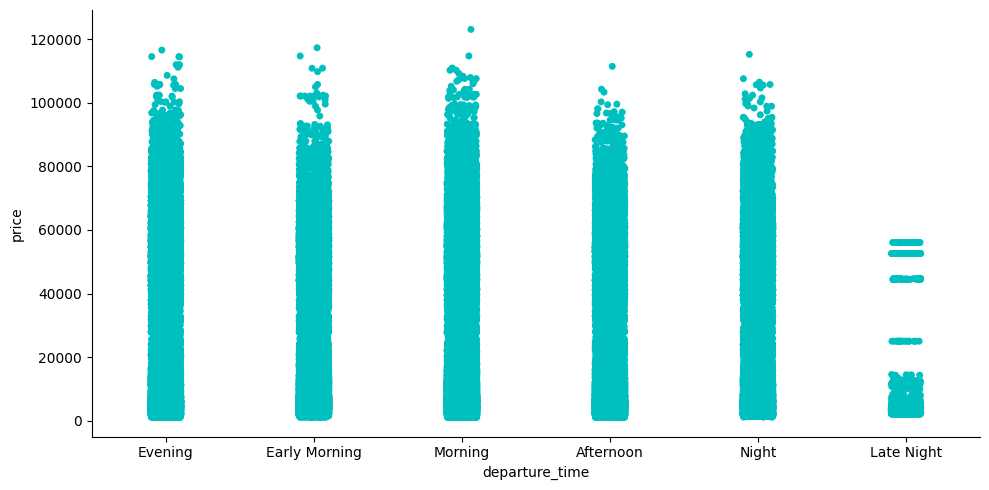

In [70]:
sns.catplot(x = 'departure_time',y = 'price',kind = 'strip',data = df,color = "c",aspect = 2)

****---> Ticket Price is More for the Flights when the Departure Time is at Morning.

****---> Ticket Price is almost equal for flights Having Departure time at Early_morning , Morning and Evening.

****---> Ticket Price is Low for the Flights Having Departure Time at Late_night.


### Analysing How the price changes with change in Source and Destination?

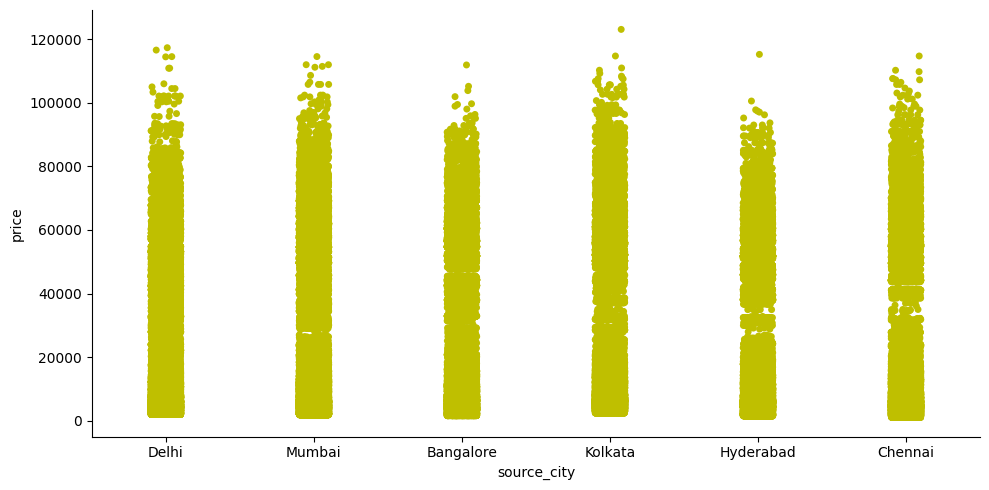

In [71]:
sns.catplot(x = 'source_city',y = 'price',kind = 'strip',data = df,color = "y",aspect = 2)
plt.show()

***--1) Ticket Price is More for the Flights whose Source City is Kolkata.

***--2) Ticket Price is almost equal for flights Having Source Cities as Mumbai and Chennai Delhi and Bangalore.

***--3) Ticket Price is Low for the Flights Having Source City as Hydrabad.

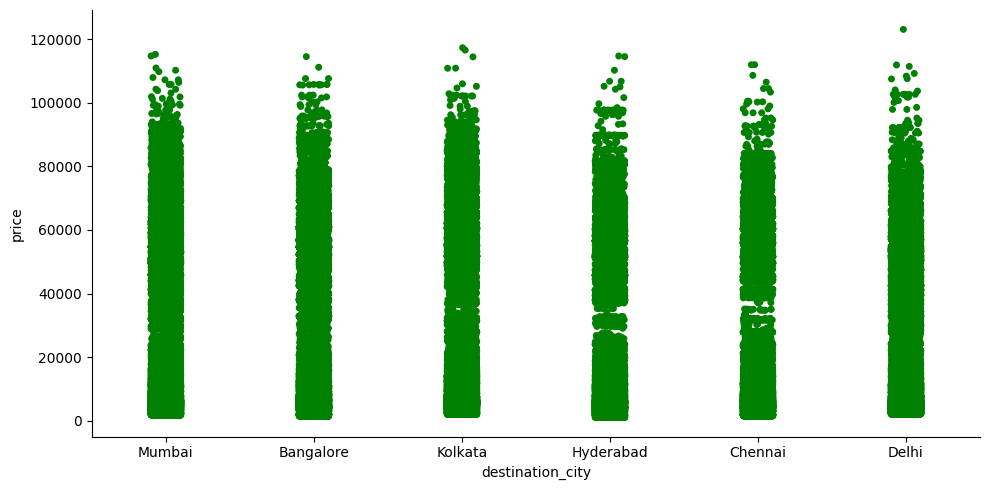

In [72]:
sns.catplot(x = 'destination_city',y = 'price',kind = 'strip',data = df,color = "g",aspect = 2)
plt.show()

***--1) Ticket Price is More for the Flights whose Destination City is kolkata and Delhi.

***--2)Ticket Price is almost equal for flights Having Destination Cities as Mumbai and Bangalore.

***--3) Ticket Price is Low for the Flights Having Destination City as Chennai.

### Checking the price variation between the source and destination in each airline

In [73]:
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean()

,airline,source_city,destination_city,price
0,Air India,Bangalore,Chennai,26765.567702
1,Air India,Bangalore,Delhi,20699.099886
2,Air India,Bangalore,Hyderabad,23395.956912
3,Air India,Bangalore,Kolkata,29105.826259
4,Air India,Bangalore,Mumbai,25625.530802
...,...,...,...,...
178,Vistara,Mumbai,Bangalore,35029.880315
179,Vistara,Mumbai,Chennai,32181.946251
180,Vistara,Mumbai,Delhi,26402.695114
181,Vistara,Mumbai,Hyderabad,29497.578017


### Checking the average prices between the cities

In [74]:
pd.pivot_table(data=df,columns='source_city',index='destination_city',values='price')

source_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
destination_city,,,,,,
Bangalore,NaN,25081.850454,17880.216315,21245.945429,22744.808428,23147.873807
Chennai,23321.850078,NaN,19369.881354,21848.065989,23660.361040,22781.899112
Delhi,17723.313972,18981.863948,NaN,17242.639473,19422.354559,18725.320008
Hyderabad,21152.051053,21591.345404,17347.288379,NaN,21500.011397,20992.128567
Kolkata,23498.234221,22669.932407,20566.409418,20823.893201,NaN,22379.146723
Mumbai,23127.231376,22765.849647,19355.829812,20065.715179,22078.883579,NaN


### Plotting the information regarding price variance between cities

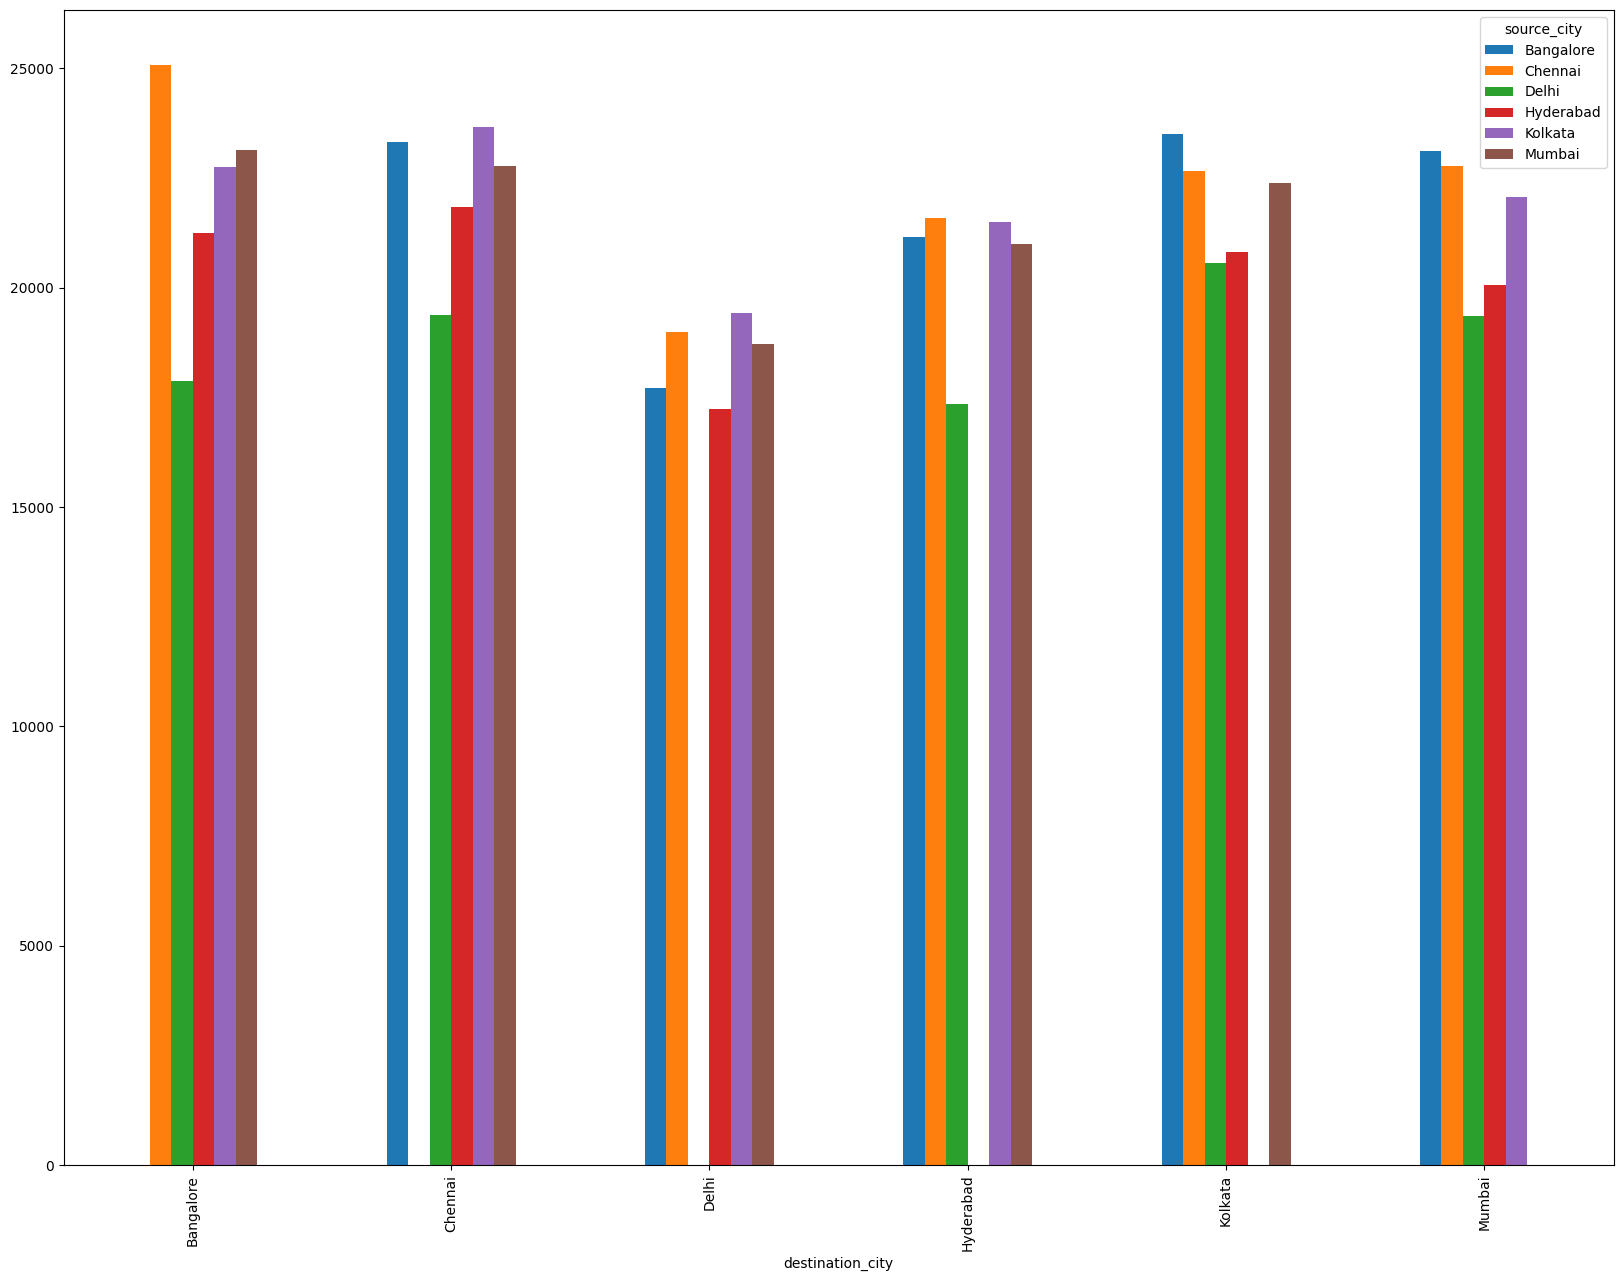

In [75]:
_ = pd.crosstab(columns = df["source_city"],index = df["destination_city"], values = df["price"], aggfunc="mean")
_.plot(kind = "bar",figsize = (20,15))
plt.show()

****---> Bangalore has the price variation in the ticket prices.

****----> Banaglore to Chennai flight has the highest fare. 

### Analyzing how does the ticket price vary between the Economy class and bussiness class

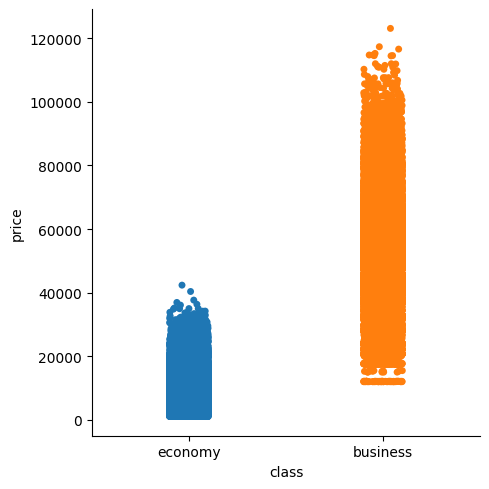

In [76]:
sns.catplot(data = df, x = "class", y = "price", aspect = 1,height = 5)
plt.show()

****--->The business class price is higher than economy class

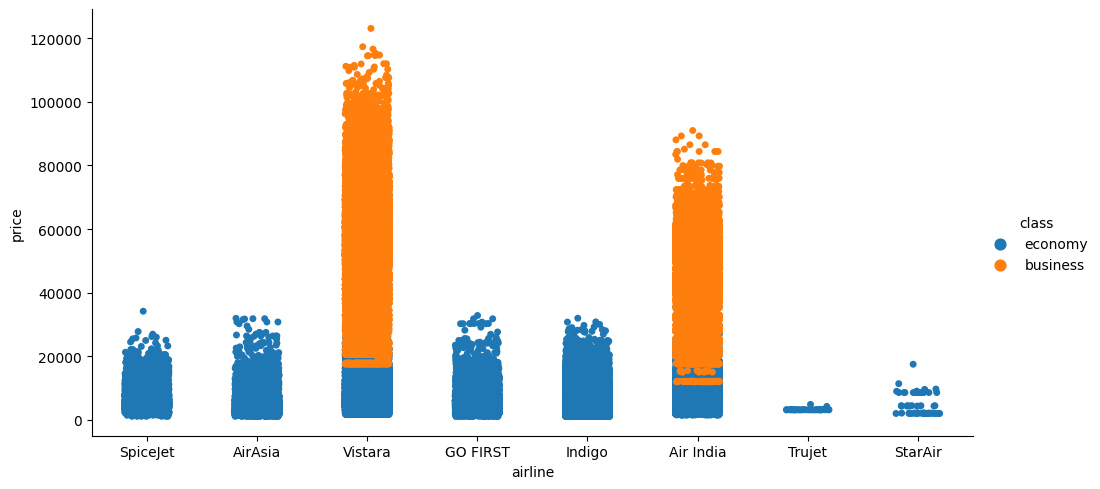

In [77]:
sns.catplot(data = df, x = "airline", y = "price", 
            hue = "class", jitter = 0.2, aspect = 2,height = 5)
plt.show()

****--> Vistara has the highest number of tickets booked in businees class 

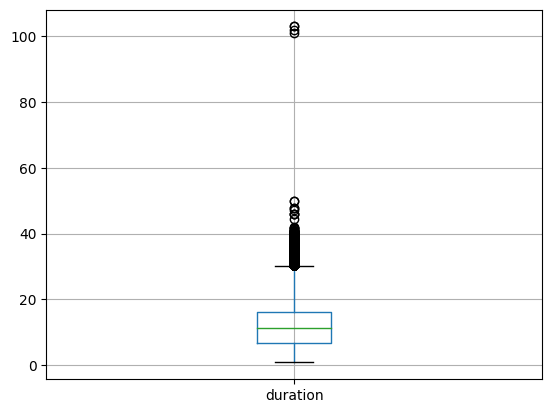

In [78]:
df.boxplot(column='duration')
plt.show()

***--> We can see that we have outliers in duration feature but we will not replace them in place of replacing them we will reduce their effect as it is  the real time, which is taken by flight from source and destination.

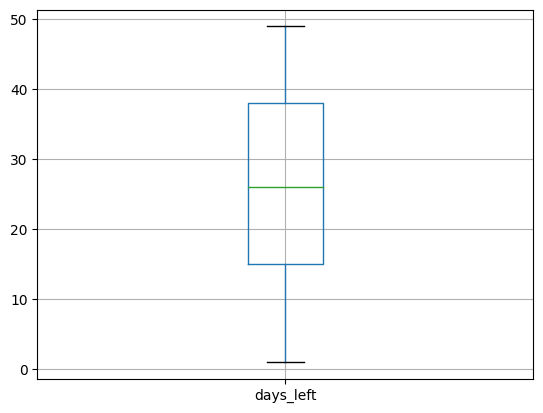

In [79]:
df.boxplot(column = "days_left") #No outliers
plt.show()

### We dont need the flight column as we are getting the more information from airline column.
### So we will drop the flight column.

In [80]:
df1=df.drop('flight',axis=1)
df1.head(1)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,economy,2.17,1,5953


#### As we know we have ordinal data in the following features:

1-- Departure time

2-- Arrival time

3-- Class

   So,we will directly replace them according to order

In [81]:
df1["departure_time"].replace({'Late Night':0,'Early Morning':1,'Morning':2,'Afternoon':3,'Evening':4,'Night':5},
                              inplace = True)
df1["arrival_time"].replace({'Late Night':0,'Early Morning':1,'Morning':2,'Afternoon':3,'Evening':4,'Night':5},
                              inplace = True)
df1["class"].replace({"economy":0,"business":1},inplace=True)
df1.head(3)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,4,0,5,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,1,0,2,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,1,0,1,Mumbai,0,2.17,1,5956


### Encoding for nominal data (we will use onehot encoder)

In [82]:
ohe = OneHotEncoder()
df1[list(df1["airline"].unique())] = ohe.fit_transform(df1[["airline"]]).A #making sparse metrics to metrics
df1 = pd.concat([df1,pd.get_dummies(df1["destination_city"],prefix = "destination_city")],axis = 1)
df1 = pd.concat([df1,pd.get_dummies(df1["source_city"],prefix = "source_city")], axis = 1)

**** We do not require airline,source_city,destination_city as so we will drop them

In [83]:
df1.drop(["airline","source_city","destination_city"],axis = 1,inplace=True)
df1.head(1)

,departure_time,stops,arrival_time,class,duration,days_left,price,SpiceJet,AirAsia,Vistara,...,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai
0,4,0,5,0,2.17,1,5953,0.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,0


## Verfying if our final columns doesnt have correlation. 

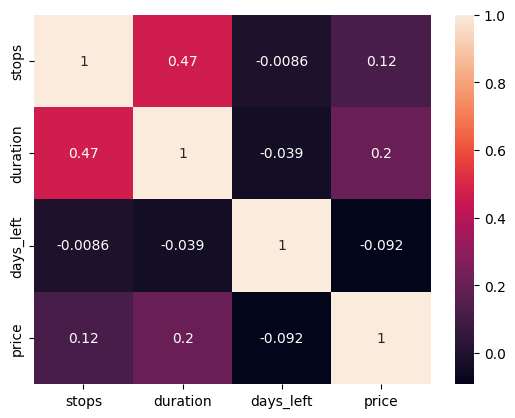

In [84]:
sns.heatmap(df.corr(),annot=True)
plt.show()

### As we can clearly see that all the values are under 5% so we can state that there is no correlation between our independent columns.So we are ready to build the model.

## Seprating and spliting the data into dependent and independent for training and testing.

In [85]:
x=df1.drop('price',axis=1)
y=df1['price']

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=2)

### Now all the data preprocessing and feature enginering and EDA has been.Now,lets build the model.

# Model Building

In [87]:
### Model selection
def get_prediction(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_train)
    maep_tr = mean_absolute_percentage_error(y_train,y_pred)
    r2_tr  = r2_score(y_train,y_pred)
    y_pred1 = model.predict(x_test)
    maep_te = mean_absolute_percentage_error(y_test,y_pred1)
    r2_te  = r2_score(y_test,y_pred1)
    return print(f"""At Training: \n%MAE: {maep_tr}\nR2_Score: {r2_tr}
    \nAt Testing: \n%MAE: {maep_te}\nR2_Score: {r2_te}""")

In [88]:
# With scalling model performances
lst = [("Linear Regression",LinearRegression()),("Decision Tree",DecisionTreeRegressor()),
      ("Random Forest",RandomForestRegressor()),("AdaBoost",AdaBoostRegressor())]

for name,model in lst:
    print(f"The Performance of {name} without Scaling::")
    get_prediction(model)
    print("*"*50)

The Performance of Linear Regression without Scaling::
At Training: 
%MAE: 0.42574125452400907
R2_Score: 0.9099826831783607
    
At Testing: 
%MAE: 0.42813228929737523
R2_Score: 0.9088184210778562
**************************************************
The Performance of Decision Tree without Scaling::
At Training: 
%MAE: 0.0022494808086234606
R2_Score: 0.9994153590993126
    
At Testing: 
%MAE: 0.07714157360592443
R2_Score: 0.97565288364387
**************************************************
The Performance of Random Forest without Scaling::
At Training: 
%MAE: 0.02813672832129243
R2_Score: 0.9975149342699461
    
At Testing: 
%MAE: 0.07300703422381064
R2_Score: 0.9847511744566663
**************************************************
The Performance of AdaBoost without Scaling::
At Training: 
%MAE: 0.3137022722314013
R2_Score: 0.9343966189715929
    
At Testing: 
%MAE: 0.31456325635055454
R2_Score: 0.934877938715843
**************************************************


## Scaling the data 

In [89]:
std=StandardScaler()

In [90]:
x_train = pd.DataFrame(std.fit_transform(x_train),columns = x_train.columns)
x_test = pd.DataFrame(std.fit_transform(x_test),columns = x_test.columns)

In [91]:
## With scalling model performances
lst = [("Linear Regression",LinearRegression()),("Decision Tree",DecisionTreeRegressor()),
      ("Random Forest",RandomForestRegressor()),("AdaBoost",AdaBoostRegressor())]
for name,model in lst:
    print(f"The Performance of {name} with Scaling::")
    get_prediction(model)
    print("*"*50)

The Performance of Linear Regression with Scaling::
At Training: 
%MAE: 0.4239363986009202
R2_Score: 0.9099785281123508
    
At Testing: 
%MAE: 13595508143.850128
R2_Score: -2.388940031030118e+19
**************************************************
The Performance of Decision Tree with Scaling::
At Training: 
%MAE: 0.0022494808086234606
R2_Score: 0.9994153590993126
    
At Testing: 
%MAE: 0.08650856557990318
R2_Score: 0.9744395414209156
**************************************************
The Performance of Random Forest with Scaling::
At Training: 
%MAE: 0.028157624235655328
R2_Score: 0.9975194727230122
    
At Testing: 
%MAE: 0.07935759013710529
R2_Score: 0.9842908690080296
**************************************************
The Performance of AdaBoost with Scaling::
At Training: 
%MAE: 0.3125570472015079
R2_Score: 0.9350522763813631
    
At Testing: 
%MAE: 0.31421318256720393
R2_Score: 0.9352737263121145
**************************************************


## As we can see that Random Forest has good r2 values at both training and testing as well and also has lowest %mae.

# So,we will go with the Random Forest Model.

In [92]:
## Training the model 
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [93]:
# Predicting the values
y_pred=rf.predict(x_test)
y_pred

array([ 4021.86, 54777.  ,  6432.35, ..., 56972.2 , 60277.32,  6377.72])

In [94]:
r2=r2_score(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print(f"The Performance of the model::\nR2_score:{r2}\n%MAE:{mape}")

The Performance of the model::
R2_score:0.9842532118236652
%MAE:0.07940589319124071


## We can see the goodness of best fit line is 98% which is quite acceptable.